In [30]:
import pandas as pd     # Library for manipulating data using DataFrames
import numpy as np      # Library used for handling arrays and utils such as min()  
import seaborn as sns   # Library for data visualisation

First, let us load the data

In [31]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
print(cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
(cancer_data['feature_names'], ['target'])

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 ['target'])

In [6]:
df = pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],columns = np.append(cancer_data['feature_names'], ['target']))

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
df.shape

(569, 31)

Train test split:


In [34]:
from sklearn.model_selection import train_test_split
data = df.drop("target",axis=1)
target = df["target"]
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.2)

### Evaluating and Predicting 

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score

sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred= sv.predict(X_test)

print("The accuracy score achieved using Linear SVM is: "+str(accuracy_score(y_pred,y_test)*100)+" %")

The accuracy score achieved using Linear SVM is: 93.85964912280701 %


In [36]:
y_pred

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

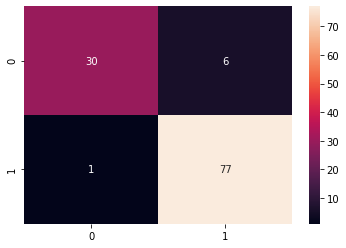

In [38]:
sns.heatmap(cm, annot=True)

## Improving the model

### Normalizing the data set

In [15]:
from sklearn import preprocessing
range_train = (X_train - X_train.min()).max()
range_test = (X_test - X_test.min()).max()


norm_x_train= ( X_train - X_train.min() )/range_train
norm_x_test= ( X_test - X_test.min() )/range_test

In [16]:
norm_x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
361,0.299068,0.401082,0.286435,0.170774,0.299630,0.125140,0.078424,0.126712,0.381313,0.147430,...,0.223052,0.457889,0.211813,0.107157,0.282837,0.135256,0.096805,0.192921,0.211315,0.075692
424,0.130673,0.318228,0.125354,0.062015,0.495351,0.186017,0.020952,0.102823,0.746465,0.428180,...,0.116684,0.297175,0.106479,0.048098,0.453213,0.104695,0.016653,0.157698,0.321506,0.164305
90,0.361541,0.483936,0.350909,0.220233,0.335019,0.194496,0.072749,0.154574,0.315657,0.183235,...,0.291000,0.455490,0.261417,0.152010,0.266328,0.144861,0.073395,0.238694,0.188646,0.114259
228,0.266884,0.482246,0.259554,0.149692,0.238332,0.161045,0.127533,0.106430,0.229293,0.215459,...,0.223052,0.514126,0.200508,0.107845,0.340289,0.308632,0.312380,0.405498,0.248571,0.267677
63,0.103744,0.140345,0.106489,0.049799,0.221901,0.199000,0.140432,0.113957,0.646970,0.414280,...,0.073995,0.192164,0.075601,0.030697,0.179555,0.136324,0.111581,0.174811,0.338459,0.195855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.237541,0.200879,0.229148,0.127169,0.402636,0.149739,0.097350,0.097386,0.514646,0.204718,...,0.204198,0.343284,0.186115,0.094057,0.439345,0.167855,0.181070,0.262268,0.357579,0.158730
494,0.292442,0.366250,0.278281,0.167635,0.187054,0.091036,0.042214,0.065656,0.329798,0.187869,...,0.233725,0.438166,0.223517,0.113817,0.268309,0.133219,0.061486,0.144158,0.221171,0.126263
89,0.362488,0.187014,0.359201,0.215652,0.546809,0.343086,0.233724,0.369263,0.533333,0.284330,...,0.299182,0.165778,0.293790,0.151986,0.373308,0.273219,0.207987,0.480069,0.312636,0.194740
507,0.193052,0.250592,0.189759,0.094592,0.602781,0.259846,0.095286,0.223105,0.451515,0.627633,...,0.133760,0.232409,0.127845,0.055520,0.627551,0.170572,0.100319,0.326942,0.239503,0.405090


<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

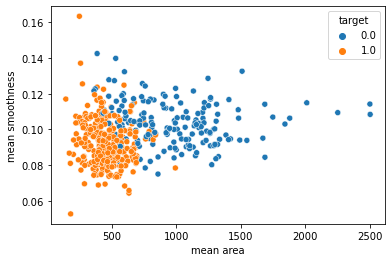

In [17]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

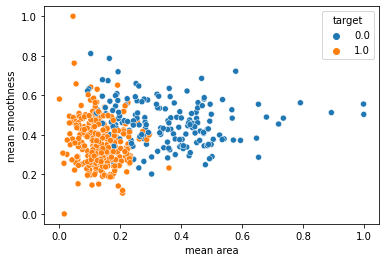

In [18]:
sns.scatterplot(x = norm_x_train['mean area'], y = norm_x_train['mean smoothness'], hue = y_train)

In [19]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()

svc_model.fit(norm_x_train, y_train)



SVC()

<AxesSubplot:>

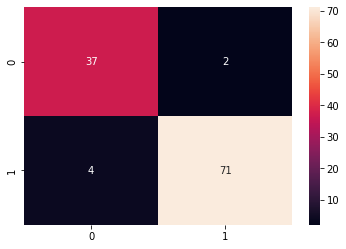

In [20]:
y_predict = svc_model.predict(norm_x_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [21]:
print("The accuracy score achieved using normalized Linear SVM is: "+str(accuracy_score(y_predict,y_test)*100)+" %")

The accuracy score achieved using normalized Linear SVM is: 94.73684210526315 %


## using SVC best parameters

In [22]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=10)
grid.fit(norm_x_train,y_train)
grid.best_params_

In [24]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [25]:
grid_predictions = grid.predict(norm_x_test)

<AxesSubplot:>

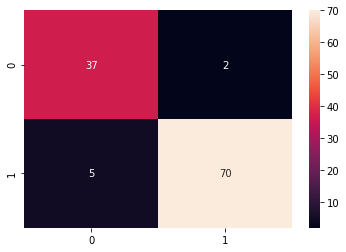

In [26]:
cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm,annot=True,fmt="d")

In [27]:
print("The accuracy score achieved using Best Parameters Linear SVM is: "+str(accuracy_score(grid_predictions,y_test)*100)+" %")

The accuracy score achieved using Best Parameters Linear SVM is: 93.85964912280701 %


In [28]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        39
         1.0       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## Checking if model could be improved by cleaning up data

In [33]:
print(df.corr()["target"].abs().sort_values(ascending=False)) 

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [39]:
data_new = df.drop("texture error","symmetry error",axis=1)

TypeError: drop() got multiple values for argument 'axis'

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=10)
grid.fit(norm_x_train,y_train)
grid.best_params_

In [45]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

<AxesSubplot:>

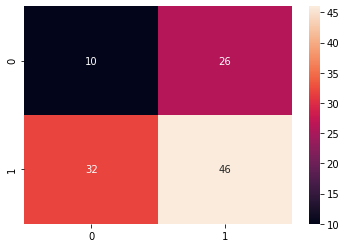

In [46]:
cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm,annot=True,fmt="d")

In [47]:
print("The accuracy score achieved using Best Parameters Linear SVM & cleaning data is: "+str(accuracy_score(grid_predictions,y_test)*100)+" %")

The accuracy score achieved using Best Parameters Linear SVM & cleaning data is: 49.122807017543856 %


Accuracy has decreased, so no cleaning is required